In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [11]:
# Grid dimensions
width, height = 20, 20

# Number of predators and prey
num_predators = 5
num_prey = 15

# Initialize grid
grid = np.zeros((width, height))

# Both predator and prey have a chance of random probability so linear chase is avoided
predator_random_move_prob = 0.3  #  Probability of random movement for predators
prey_random_move_prob = 0.2       # Probability of random movement for prey. 


In [12]:
def check_min_distance(x, y, animal_type, min_distance):
    """
    This function checks whether there is any animal of a specified type within a minimum distance
    from a given position (x, y) on the grid.

    :param x, y: The coordinates of the position to check around.
    :param animal_type: The type of animal to check for (1 for predator, 2 for prey).
    :param min_distance: The minimum distance threshold.
    :return: Returns False if an animal of the specified type is within the minimum distance,
             otherwise returns True.
    """
    for i in range(width):
        for j in range(height):
            if grid[i, j] == animal_type and abs(x - i) + abs(y - j) < min_distance: #Manhattan distance
                return False
    return True

In [13]:
# Functions for placing animals, finding nearest other type, and moving animals
def place_animals(num, animal_type, min_distance=0):
    for _ in range(num):
        while True:
            x, y = random.randint(0, width-1), random.randint(0, height-1)
            if grid[x, y] == 0 and (min_distance == 0 or check_min_distance(x, y, animal_type, min_distance)):
                grid[x, y] = animal_type
                break

In [14]:
def find_nearest(x, y, animal_type):
    """
    This function finds the nearest animal of a specified type to the given coordinates (x, y).
    
    :param x, y: The current position of the animal.
    :param animal_type: The type of animal to find (1 for predator, 2 for prey).
    :return: Coordinates (nearest_x, nearest_y) of the nearest animal of the specified type.
    """
    min_dist = float('inf')
    nearest_x, nearest_y = x, y
    for i in range(width):
        for j in range(height):
            if grid[i, j] == animal_type:
                dist = abs(x - i) + abs(y - j) #Manhattan distance
                if dist < min_dist:
                    min_dist = dist
                    nearest_x, nearest_y = i, j
    return nearest_x, nearest_y


In [15]:
def move_predators():
    """
    This function defines the movement behavior of predators.
    Predators move towards the nearest prey, with a chance of random movement.
    """
    global grid
    new_grid = np.copy(grid)
    for x in range(width):
        for y in range(height):
            if grid[x, y] == 1:
                if random.random() < predator_random_move_prob:
                    dx, dy = random.choice([(0,1), (1,0), (0,-1), (-1,0)])
                else:
                    target_x, target_y = find_nearest(x, y, 2)
                    dx, dy = np.sign(target_x - x), np.sign(target_y - y)
                
                new_x, new_y = (x + dx) % width, (y + dy) % height
                if new_grid[new_x, new_y] == 2:
                    new_grid[new_x, new_y] = 1
                    new_grid[x, y] = 0
                elif new_grid[new_x, new_y] == 0:
                    new_grid[new_x, new_y] = 1
                    new_grid[x, y] = 0
    grid = new_grid

In [16]:
def move_prey():
    """
    This function defines the movement behavior of prey.
    Prey try to move away from the nearest predator, with a chance of random movement.
    """
    global grid
    new_grid = np.copy(grid)
    for x in range(width):
        for y in range(height):
            if grid[x, y] == 2:
                if random.random() < prey_random_move_prob:
                    dx, dy = random.choice([(0,1), (1,0), (0,-1), (-1,0)])
                else:
                    target_x, target_y = find_nearest(x, y, 1)
                    dx, dy = -np.sign(target_x - x), -np.sign(target_y - y)
                
                new_x, new_y = (x + dx) % width, (y + dy) % height
                if new_grid[new_x, new_y] == 0:
                    new_grid[new_x, new_y] = 2
                    new_grid[x, y] = 0
    grid = new_grid

In [17]:
# Placing predators and prey with minimum distance criteria for prey
place_animals(num_predators, 1)
place_animals(num_prey, 2, min_distance=3)


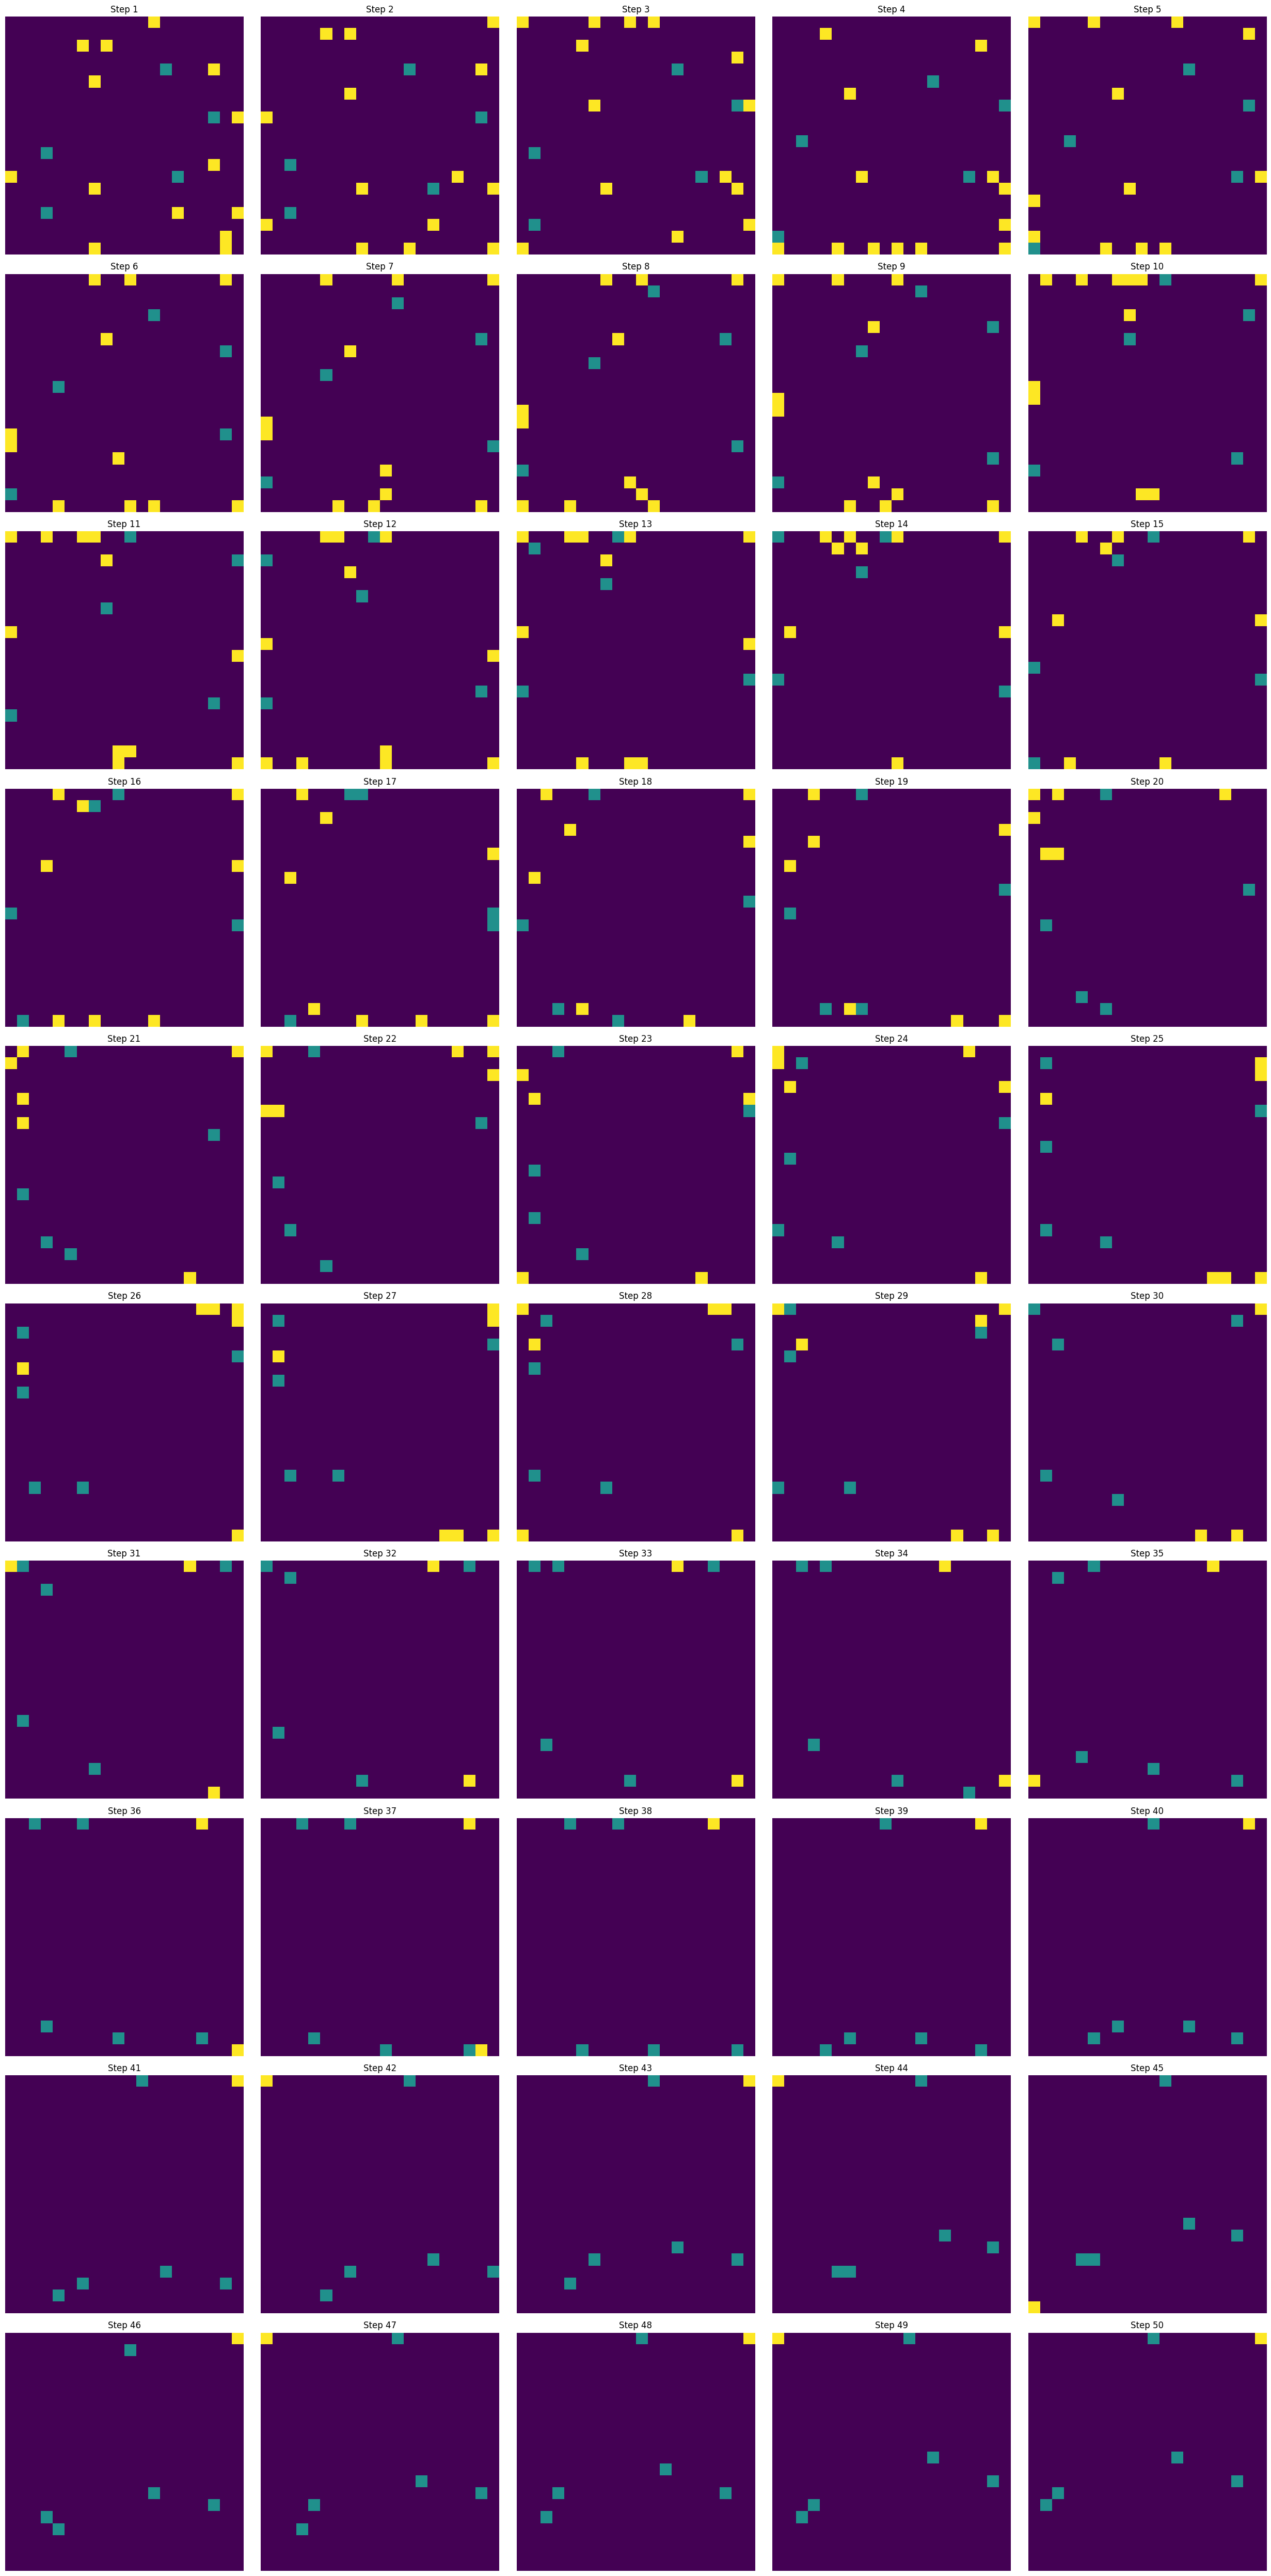

In [18]:
# Running the simulation and plotting the results
# Yellow squares represent prey and blue squares represent predators
fig, axes = plt.subplots(10, 5, figsize=(25, 50))  # 10 rows, 5 columns
for step in range(50):
    move_predators()
    move_prey()

    row, col = divmod(step, 5)
    ax = axes[row, col]
    ax.imshow(grid, cmap='viridis')
    ax.set_title(f"Step {step + 1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

